# Notebook Author info
<center>

| |  |
| ----------- | ----------- |
| ![Emdadul Haque Rafat](https://rafat97.github.io/static/c3688eb99d1fef50023a121e3abc5fa6/e8044/my-image.jpg)      | `Name:` Emdadul Haque<br /><br /> `Professional Status:` Student of Computer Science and Engineering <br /><br /> `Email:` rafathaque1997@gmail.com <br /><br /> `Website :` https://rafat97.github.io/ <br /><br />`Github:` https://github.com/Rafat97 <br /><br /> `Linkedin:` https://www.linkedin.com/in/rafat-haque-173131139/   |

</center>


# Drive mount code

In [1]:
# from google.colab import drive
# drive.mount('./drive')

# Dataset Creation

## Download dataset 2



In [2]:
!gdown --id 1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A

Downloading...
From: https://drive.google.com/uc?id=1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A
To: /content/Dataset 2.csv
100% 999k/999k [00:00<00:00, 66.1MB/s]


## Import package

In [3]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)

## Read downloaded dataset

In [4]:
df = pd.read_csv('/content/Dataset 2.csv',encoding='unicode_escape')

In [5]:
df.columns ## columns name

Index(['text', 'polarity'], dtype='object')

In [6]:
df['polarity'].value_counts() ## get number of data in `polarity` class

0    8000
1    2314
Name: polarity, dtype: int64

In [7]:
df['text'].value_counts()

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÃÂ                                                          11
25-04-18                                                                                                                                                4
More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÃÂ Ã¢ÂÂ¦            4
suffering from chronic depression https://vine.co/v/iu3l2lPBhiKÃÂ                                                                                      3
Good morning                                                                                                                                            3
                                                                                                                                                       ..
@ChArDaLiCiOuZ sige ingat goodnight                                         

## Dataset splitting

In [8]:
## split dataset based on the class
traning_split_size = 0.8
df_class_1 = df[df['polarity'] == 1]
df_class_0 = df[df['polarity'] == 0]

trainSize = int(len(df_class_0) * traning_split_size)
Traning_class_0 = df_class_0[:trainSize]
Test_class_0 = df_class_0[trainSize:]

trainSize = int(len(df_class_1) * traning_split_size)
Traning_class_1 = df_class_1[:trainSize]
Test_class_1 = df_class_1[trainSize:]

In [9]:
## traning dataset create
li = [Traning_class_0,Traning_class_1]
frame = pd.concat(li, axis=0, ignore_index=True)
frame = shuffle(frame)
frame.reset_index(inplace=True, drop=True)
frame.to_csv('Train-Dataset.csv',index=False)
frame

,text,polarity
0,see I've learned a lot about myself through RP...,1
1,@scodal Why thank you! This is Bonzo... He's m...,0
2,@NotAloneDoc1 It was one of the best documenta...,1
3,@AtomicLola AWESOME! I'm glad you liked it! ...,0
4,that's not necessarily suffering from a mental...,1
...,...,...
8246,@ Heinz Field for the Kenny Chesney concert _...,0
8247,picture,0
8248,@d4v3c00k Dave &quot;The Cat&quot; Cook lands...,0
8249,lol i've honestly been going through the worst...,1


In [10]:
## testing dataset create
li = [Test_class_0,Test_class_1]
frame = pd.concat(li, axis=0, ignore_index=True)
frame = shuffle(frame)
frame.reset_index(inplace=True, drop=True)
frame.to_csv('Test-Dataset.csv',index=False)
frame

,text,polarity
0,@JusBOnline but isn't what anyone thinks of me...,1
1,"Analysis of 2,000 millennials found that the c...",1
2,@networkbarefoot @gina_romero @OrganisedPA Gr...,0
3,"@galaxite Oh, just a friend. lol. ;) the same ...",0
4,Time to get a few things done while kiddies ar...,0
...,...,...
2058,RANK UP ! YEAH YOU GUYS GOT PWND !,0
2059,JUST WOKE UP !!!! WITH ANAÃ?S,0
2060,Radio personality talks about clinical depress...,1
2061,I'd just like to say that I really love my job.,0


# Text cleaning

In [11]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys,re,string
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace
try:
  import contractions
except:
  !pip install contractions
import contractions
from torchtext.legacy.data import Field, TabularDataset, BucketIterator
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vectors, GloVe

import nltk
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('averaged_perceptron_tagger')
    nltk.data.find('brown')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
    nltk.download('brown')
    nltk.download('punkt')
from nltk import sent_tokenize,word_tokenize


warnings.filterwarnings('ignore')
torch.manual_seed(0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
traning_df = pd.read_csv('/content/Train-Dataset.csv')
testing_df = pd.read_csv('/content/Test-Dataset.csv')

In [13]:
traning_df

,text,polarity
0,see I've learned a lot about myself through RP...,1
1,@scodal Why thank you! This is Bonzo... He's m...,0
2,@NotAloneDoc1 It was one of the best documenta...,1
3,@AtomicLola AWESOME! I'm glad you liked it! ...,0
4,that's not necessarily suffering from a mental...,1
...,...,...
8246,@ Heinz Field for the Kenny Chesney concert _...,0
8247,picture,0
8248,@d4v3c00k Dave &quot;The Cat&quot; Cook lands...,0
8249,lol i've honestly been going through the worst...,1


In [14]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers. removibng miltiple full stop'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'\.+', ".", text)
    return text

def replace_text(text):
    text = str(text).lower()
    text = text.encode('ascii', 'ignore').decode('utf-8') 
    return text  


for dta in [traning_df,testing_df]:
  dta['text_cleaning'] = dta.text.apply(lambda x: x.strip().lower() )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x : " ".join(x.split()) )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x: contractions.fix(x) )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x: clean_text(x) )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x: replace_text(x) )
  dta['number_of_word'] = dta.text_cleaning.apply(lambda x: len(word_tokenize(x)) )
  dta['number_of_letter'] = dta.text_cleaning.apply(lambda x: len(x) )
  del dta['text']
  dta['text'] = dta['text_cleaning'] 
  del dta['text_cleaning']



for dta in [traning_df,testing_df]:
  word_count_zero = dta[dta['number_of_word'] == 0]
  dta.drop(word_count_zero.index,inplace=True)
  letter_count_zero = dta[dta['number_of_letter'] == 0]
  dta.drop(letter_count_zero.index,inplace=True)


# # Training DF
# traning_df['text_cleaning'] = traning_df.text.apply(lambda x: x.strip().lower() )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x : " ".join(x.split()) )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x: contractions.fix(x) )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x: clean_text(x) )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x: replace_text(x) )

# # Testing DF
# testing_df['text_cleaning'] = testing_df.text.apply(lambda x: x.strip().lower() )
# testing_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x : " ".join(x.split()) )
# testing_df['text_cleaning'] = testing_df.text_cleaning.apply(lambda x: contractions.fix(x) )
# testing_df['text_cleaning'] = testing_df.text_cleaning.apply(lambda x: clean_text(x) )
# testing_df['text_cleaning'] = testing_df.text_cleaning.apply(lambda x: replace_text(x) )


In [15]:
traning_df

,polarity,number_of_word,number_of_letter,text
0,1,47,266,see i have learned a lot about myself through ...
1,0,22,115,scodal why thank you this is bonzo he is my bu...
2,1,32,170,it was one of the best documentarys i watched...
3,0,12,57,atomiclola awesome i am glad you liked it i am...
4,1,45,247,that is not necessarily suffering from a menta...
...,...,...,...,...
8246,0,11,75,heinz field for the kenny chesney concert le...
8247,0,1,7,picture
8248,0,11,59,dave quotthe catquot cook lands on his feet a...
8249,1,22,113,lol i have honestly been going through the wor...


In [16]:
alltext_length = []
allword_length = []
for val in traning_df.text:
  word_tok = word_tokenize(val)
  alltext_length.append(len(val))
  allword_length.append(len(word_tok))

print(max(alltext_length))
print(max(allword_length))

# traning_df.text.apply(lambda x: len(x) )

289
62


In [17]:
for val in traning_df.text:
  word_tok = word_tokenize(val)
  if len(word_tok) <= 1:
    print(val)

comeagainjen   
may    
spurofmoment
makemescream
name
depression  
depression  
 with 
depression  
     subway
name
depression
ferngully
quickshooter                
 thanks
incoming
 yup
oneofusisfdup
katelyniscool   
shaundiviney
scarych         
 sorite
twittermaniaaaaaaaaaaa
around
party 
 thanks
 thanks
houseeee
realworldmom
 whaaatever
llisalang
radiogrinch 
remysoon
jonathanrknight
reading
shopping
lonlonraanch
beeeeeeed
  thirsty
depression  
 thanks
  updates
fairyfreia          
depression  
depression  
picture


In [18]:
traning_df.to_csv('/content/Train-Dataset-prcessed.csv',index=False)
testing_df.to_csv('/content/Test-Dataset-prcessed.csv',index=False)

# Training & `CNN` modeling

In [19]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys,re,string
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
!pip install torchinfo
from torchinfo import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace
try:
  import contractions
except:
  !pip install contractions
import contractions
from torchtext.legacy.data import Field, TabularDataset, BucketIterator
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vectors, GloVe
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import nltk
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('averaged_perceptron_tagger')
    nltk.data.find('brown')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
    nltk.download('brown')
    nltk.download('punkt')
from nltk import sent_tokenize,word_tokenize


warnings.filterwarnings('ignore')
torch.manual_seed(0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
traning_df = pd.read_csv('/content/Train-Dataset-prcessed.csv')
testing_df = pd.read_csv('/content/Test-Dataset-prcessed.csv')

In [21]:
traning_df

,polarity,number_of_word,number_of_letter,text
0,1,47,266,see i have learned a lot about myself through ...
1,0,22,115,scodal why thank you this is bonzo he is my bu...
2,1,32,170,it was one of the best documentarys i watched...
3,0,12,57,atomiclola awesome i am glad you liked it i am...
4,1,45,247,that is not necessarily suffering from a menta...
...,...,...,...,...
8239,0,11,75,heinz field for the kenny chesney concert le...
8240,0,1,7,picture
8241,0,11,59,dave quotthe catquot cook lands on his feet a...
8242,1,22,113,lol i have honestly been going through the wor...


In [22]:
label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(tokenize='spacy', lower=True, include_lengths=True, batch_first=True)
fields = [('polarity', label_field),  ('text', text_field)]


train_data = TabularDataset(path="/content/Train-Dataset-prcessed.csv",
                                 format="csv",
                                  fields=fields,
                                 skip_header=True)

valid_data = TabularDataset(path="/content/Test-Dataset-prcessed.csv",
                                 format="csv",
                                  fields=fields,
                                 skip_header=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_iter = BucketIterator(train_data, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid_data, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)


text_field.build_vocab(train_data,) # min_freq=3,vectors = "glove.6B.100d"
label_field.build_vocab(train_data)

In [23]:
#No. of unique tokens in text
print("Size of TEXT vocabulary:",len(text_field.vocab))

#No. of unique tokens in label
print("Size of LABEL vocabulary:",len(label_field.vocab))

#Commonly used words
print(text_field.vocab.freqs.most_common(10))  

#Word dictionary
print(text_field.vocab.stoi)   

Size of TEXT vocabulary: 64
Size of LABEL vocabulary: 3
[('8', 459), ('6', 446), ('7', 427), ('5', 407), ('9', 407), ('13', 379), ('10', 376), ('11', 369), ('12', 359), ('4', 329)]
defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f7554e9b190>>, {'<unk>': 0, '<pad>': 1, '8': 2, '6': 3, '7': 4, '5': 5, '9': 6, '13': 7, '10': 8, '11': 9, '12': 10, '4': 11, '15': 12, '14': 13, '16': 14, '18': 15, '17': 16, '3': 17, '19': 18, '21': 19, '20': 20, '23': 21, '22': 22, '24': 23, '2': 24, '25': 25, '26': 26, '27': 27, '29': 28, '28': 29, '1': 30, '30': 31, '32': 32, '31': 33, '36': 34, '38': 35, '39': 36, '45': 37, '41': 38, '33': 39, '34': 40, '42': 41, '43': 42, '48': 43, '49': 44, '44': 45, '47': 46, '46': 47, '37': 48, '40': 49, '35': 50, '50': 51, '52': 52, '51': 53, '53': 54, '54': 55, '55': 56, '56': 57, '58': 58, '61': 59, '57': 60, '59': 61, '60': 62, '62': 63})


In [24]:
# for batch in train_iter:
#     print(batch.polarity)
#     print(batch.text)

## Code 1


In [25]:
# import torch.nn as nn
# class LSTMTagger(torch.nn.Module):

#     def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
#         super(LSTMTagger, self).__init__()
#         self.hidden_dim = hidden_dim

#         self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

#         # The LSTM takes word embeddings as inputs, and outputs hidden states
#         # with dimensionality hidden_dim.
#         self.lstm = nn.LSTM(embedding_dim, hidden_dim)

#         # The linear layer that maps from hidden state space to tag space
#         self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

#     def forward(self, sentence):
#         embeds = self.word_embeddings(sentence)
#         # print(len(sentence))
        
#         x = embeds.view(len(sentence), 1, -1)
        
#         # print(x.shape)
#         lstm_out, _ = self.lstm(x)
#         tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
#         tag_scores = torch.nn.functional.log_softmax(tag_space, dim=1)
#         return tag_scores

In [26]:
# EMBEDDING_DIM = 6
# HIDDEN_DIM = 6
# model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(text_field.vocab), 1)
# loss_function = torch.nn.NLLLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.00001)
# criterion = torch.nn.BCEWithLogitsLoss()

In [27]:
# from torchinfo import summary
# summary( model, input_size=(1,),dtypes=[torch.long],)

In [28]:
# def binary_accuracy(preds, y):

#     rounded_preds = torch.round(torch.sigmoid(preds))
#     correct = (rounded_preds == y).float() 
#     acc = correct.sum() / len(correct)
#     return acc

In [29]:
# # training function 
# def train(model, iterator):
    
#     epoch_loss = 0
#     epoch_acc = 0
    
#     model.train()
    
#     for i,batch in enumerate( iterator,1):
#         text, text_lengths = batch.text
        
#         optimizer.zero_grad()
#         predictions = model(text,).squeeze(1)
        
#         loss = criterion(predictions, batch.polarity)
#         acc = binary_accuracy(predictions, batch.polarity)

#         loss.backward()
#         optimizer.step()
        
#         epoch_loss += loss.item()
#         epoch_acc += acc.item()

#         print_val = f"running_loss : {(loss.item()):.6f}\t"
#         print_val += f"running_corrects : {acc.item():.6f}\t"  
#         sys.stdout.write('\r' + str(print_val))
        

#     return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [30]:
# def evaluate(model, iterator):
    
#     epoch_loss = 0
#     epoch_acc = 0
#     model.eval()
    
#     with torch.no_grad():
#         for batch in iterator:
#             text, text_lengths = batch.text
#             predictions = model(text,).squeeze(1)
#             loss = criterion(predictions, batch.polarity)
#             acc = binary_accuracy(predictions, batch.polarity)
            
#             epoch_acc += acc.item()
#             epoch_loss += loss.item()
        
#     return  epoch_loss / len(iterator), epoch_acc / len(iterator) 

In [31]:
# t = time.time()
# loss=[]
# acc=[]
# val_acc=[]
# val_loss=[]
# num_epochs = 100

# for epoch in range(num_epochs):
    
#     train_loss, train_acc = train(model, train_iter)
#     valid_loss, valid_acc = evaluate(model, valid_iter)
    
#     print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%  | Val. Acc: {valid_acc*100:.2f}%')
#     # print(f'\t')
    
#     loss.append(train_loss)
#     acc.append(train_acc)
#     val_loss.append(valid_loss)
#     val_acc.append(valid_acc)
    
# print(f'time:{time.time()-t:.3f}')

## Code 2


In [32]:
# import torch.nn as nn
# class RNNModel(torch.nn.Module):

#     def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
#         super(RNNModel, self).__init__()
#         self.hidden_dim = hidden_dim

#         self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

#         self.rnn = nn.RNN(embedding_dim, hidden_dim, 2, batch_first=True, nonlinearity='relu')
#         self.fc = nn.Linear(hidden_dim, tagset_size)

#     def forward(self, sentence):
#         embeds = self.word_embeddings(sentence)
#         # print(len(sentence))
#         # x = embeds.view(len(sentence), 1, -1)
#          # Initialize hidden state with zeros
#         h0 = torch.autograd.Variable(torch.zeros(2, sentence.size(0), self.hidden_dim))
            
#         out, hn = self.rnn(embeds, h0)
#         out = self.fc(out[:, -1, :]) 
#         return out

In [33]:
# EMBEDDING_DIM = 6
# HIDDEN_DIM = 6
# model = RNNModel(EMBEDDING_DIM, HIDDEN_DIM, len(text_field.vocab), 1)
# loss_function = torch.nn.NLLLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.00001)
# criterion = torch.nn.BCEWithLogitsLoss()

In [34]:
# from torchinfo import summary
# summary( model, input_size=(1,),dtypes=[torch.long],)

In [35]:
# def binary_accuracy(preds, y):

#     rounded_preds = torch.round(torch.sigmoid(preds))
#     correct = (rounded_preds == y).float() 
#     acc = correct.sum() / len(correct)
#     return acc

In [36]:
# # training function 
# def train(model, iterator):
    
#     epoch_loss = 0
#     epoch_acc = 0
    
#     model.train()
    
#     for i,batch in enumerate( iterator,1):
#         text, text_lengths = batch.text
        
#         optimizer.zero_grad()
#         predictions = model(text,).squeeze(1)
        
#         loss = criterion(predictions, batch.polarity)
#         acc = binary_accuracy(predictions, batch.polarity)

#         loss.backward()
#         optimizer.step()
        
#         epoch_loss += loss.item()
#         epoch_acc += acc.item()

#         print_val = f"running_loss : {(loss.item()):.6f}\t"
#         print_val += f"running_corrects : {acc.item():.6f}\t"  
#         sys.stdout.write('\r' + str(print_val))
        

#     return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [37]:
# def evaluate(model, iterator):
    
#     epoch_loss = 0
#     epoch_acc = 0
#     model.eval()
    
#     with torch.no_grad():
#         for batch in iterator:
#             text, text_lengths = batch.text
#             predictions = model(text,).squeeze(1)
#             loss = criterion(predictions, batch.polarity)
#             acc = binary_accuracy(predictions, batch.polarity)
            
#             epoch_acc += acc.item()
#             epoch_loss += loss.item()
        
#     return  epoch_loss / len(iterator), epoch_acc / len(iterator) 

In [38]:
# t = time.time()
# loss=[]
# acc=[]
# val_acc=[]
# val_loss=[]
# num_epochs = 100

# for epoch in range(num_epochs):
    
#     train_loss, train_acc = train(model, train_iter)
#     valid_loss, valid_acc = evaluate(model, valid_iter)
    
#     print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%  | Val. Acc: {valid_acc*100:.2f}%')
#     # print(f'\t')
    
#     loss.append(train_loss)
#     acc.append(train_acc)
#     val_loss.append(valid_loss)
#     val_acc.append(valid_acc)
    
# print(f'time:{time.time()-t:.3f}')

## Code 3 Model 

In [39]:
import torch.nn as nn

class LSTM_net(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)
        
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        
        self.fc2 = nn.Linear(hidden_dim, 1)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        
        # text = [sent len, batch size]
        
        embedded = self.embedding(text)
        
        # embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        # print(embedded.shape,text_lengths)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths,batch_first=True)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        #unpack sequence
        # output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        # output = [sent len, batch size, hid dim * num directions]
        # output over padding tokens are zero tensors
        
        # hidden = [num layers * num directions, batch size, hid dim]
        # cell = [num layers * num directions, batch size, hid dim]
        
        # concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        # and apply dropout
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        output = self.fc1(hidden)
        output = self.dropout(self.fc2(output))
                
        #hidden = [batch size, hid dim * num directions]
            
        return output




In [40]:
class CNN(torch.nn.Module): 
    def __init__(self , vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        super(CNN, self).__init__()

        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        #initializing convolution layer
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.conv3 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1)

        #initializing dropout 
        self.dropout = torch.nn.Dropout(0.2)

        #initializing MaxPool2d 
        self.pool= torch.nn.MaxPool2d(2,2)
 
        #initializing linear
        self.fc1 = torch.nn.Linear(64* 1* 1, 512)
        self.fc2 = torch.nn.Linear(512,64)
        self.fc3 = torch.nn.Linear(64,output_dim)

 
    def forward(self, text):
        embedded = self.embedding(text)
        x = embedded.view(-1,1,16,16) 
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(torch.nn.functional.relu(self.conv2(x))) 
        x = self.dropout(x)
        x = self.pool(torch.nn.functional.relu(self.conv3(x))) 
        x = x.view(-1, 64* 1* 1) 
        # x = self.pool(torch.nn.functional.relu(x)) 
        # x = x.view(-1, 32* 1* 1) 
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [41]:
# Hyperparameters
num_epochs = 100
learning_rate = 0.0001

INPUT_DIM = len(text_field.vocab)
EMBEDDING_DIM = 256
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.2
PAD_IDX = text_field.vocab.stoi[text_field.pad_token] # padding

In [42]:
model = CNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX).to(device)

from torchinfo import summary
summary( model, input_size=(1, 10),dtypes=[torch.long],)

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      --                        --
├─Embedding: 1-1                         [1, 10, 256]              16,384
├─Conv2d: 1-2                            [10, 16, 14, 14]          160
├─MaxPool2d: 1-3                         [10, 16, 7, 7]            --
├─Dropout: 1-4                           [10, 16, 7, 7]            --
├─Conv2d: 1-5                            [10, 32, 5, 5]            4,640
├─MaxPool2d: 1-6                         [10, 32, 2, 2]            --
├─Dropout: 1-7                           [10, 32, 2, 2]            --
├─Conv2d: 1-8                            [10, 64, 2, 2]            2,112
├─MaxPool2d: 1-9                         [10, 64, 1, 1]            --
├─Linear: 1-10                           [10, 512]                 33,280
├─Linear: 1-11                           [10, 64]                  32,832
├─Linear: 1-12                           [10, 1]                  

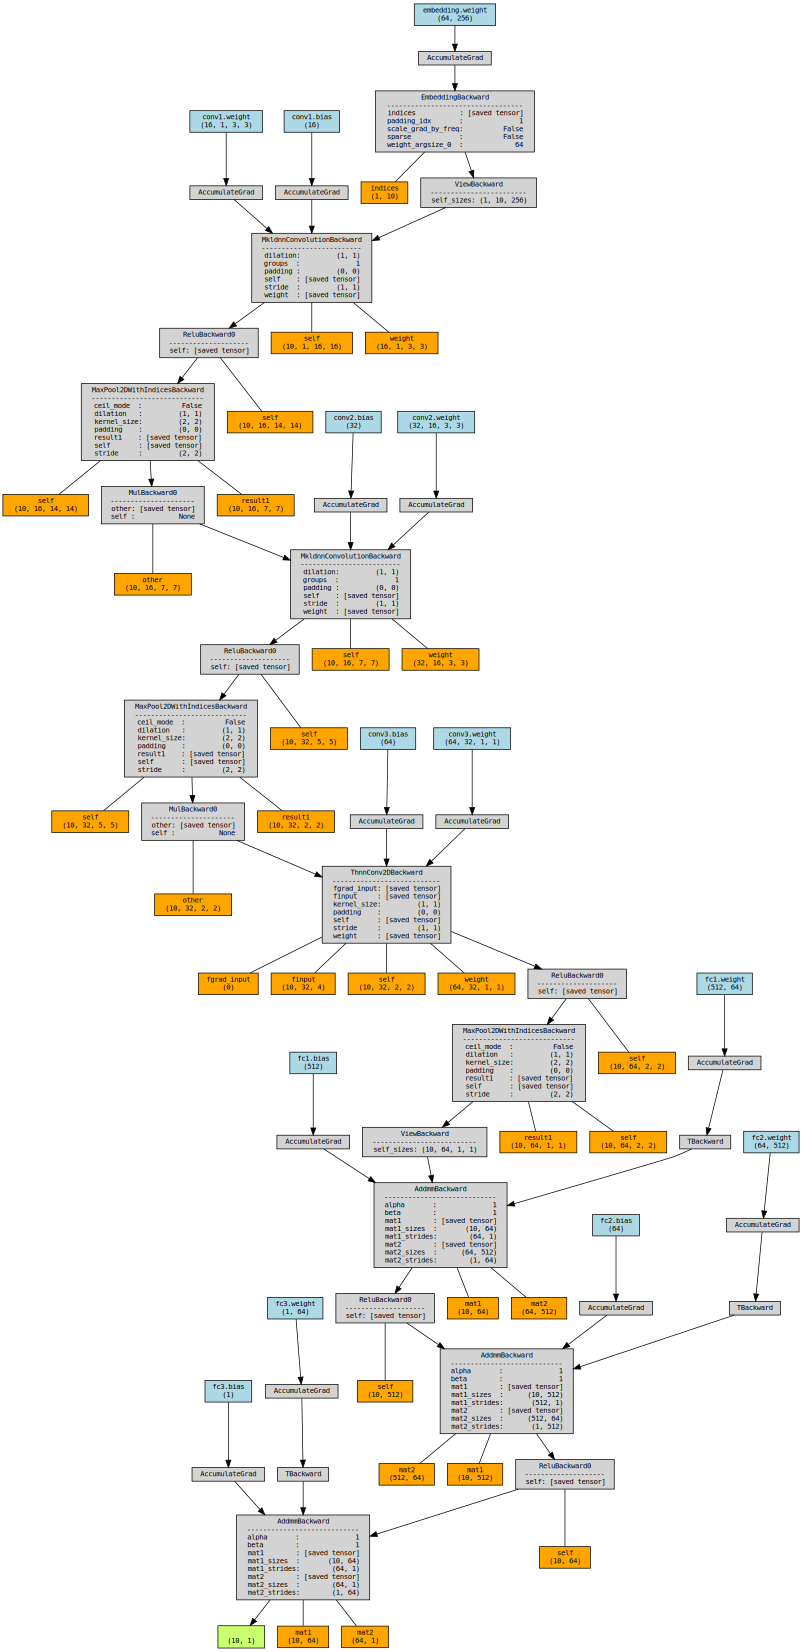

In [43]:
x = torch.randint(3, 5, (1,10)).to(device)
make_dot(model(x), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)

In [44]:
make_dot(model(x), params=dict(model.named_parameters()), show_attrs=True, show_saved=True).render("Model-CNN", format="png")

'Model-CNN.png'

In [45]:
# model = LSTM_net(INPUT_DIM, 
#             EMBEDDING_DIM, 
#             HIDDEN_DIM, 
#             OUTPUT_DIM, 
#             N_LAYERS, 
#             BIDIRECTIONAL, 
#             DROPOUT, 
#             PAD_IDX)

In [46]:
model.to(device)

# Loss and optimizer
criterion = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [47]:
def binary_accuracy(preds, y):

    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc

In [48]:
# training function 
def train(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for i,batch in enumerate( iterator,1):
        text, text_lengths = batch.text
        
        optimizer.zero_grad()
        predictions = model(text).squeeze(1)
        
        loss = criterion(predictions, batch.polarity)
        acc = binary_accuracy(predictions, batch.polarity)

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

        print_val = f"running_loss : {(loss.item()):.6f}\t"
        print_val += f"running_corrects : {acc.item():.6f}\t"  
        sys.stdout.write('\r' + str(print_val))
        

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [49]:
def evaluate(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.text
            predictions = model(text,).squeeze(1)
            loss = criterion(predictions, batch.polarity)
            acc = binary_accuracy(predictions, batch.polarity)
            
            epoch_acc += acc.item()
            epoch_loss += loss.item()
        
    return  epoch_loss / len(iterator), epoch_acc / len(iterator) 

In [50]:
t = time.time()
loss=[]
acc=[]
val_acc=[]
val_loss=[]

for epoch in range(num_epochs):
    
    train_loss, train_acc = train(model, train_iter)
    valid_loss, valid_acc = evaluate(model, valid_iter)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%  | Val. Acc: {valid_acc*100:.2f}%')
    # print(f'\t')
    
    loss.append(train_loss)
    acc.append(train_acc)
    val_loss.append(valid_loss)
    val_acc.append(valid_acc)
    
print(f'time:{time.time()-t:.3f}')

running_loss : 0.635272	running_corrects : 0.700000		Train Loss: 0.551 | Train Acc: 76.89%  | Val. Acc: 77.65%
running_loss : 0.631176	running_corrects : 0.700000		Train Loss: 0.533 | Train Acc: 77.58%  | Val. Acc: 77.65%
running_loss : 0.615502	running_corrects : 0.700000		Train Loss: 0.532 | Train Acc: 77.58%  | Val. Acc: 77.65%
running_loss : 0.622020	running_corrects : 0.700000		Train Loss: 0.531 | Train Acc: 77.58%  | Val. Acc: 77.65%
running_loss : 0.618891	running_corrects : 0.700000		Train Loss: 0.529 | Train Acc: 77.58%  | Val. Acc: 77.65%
running_loss : 0.653960	running_corrects : 0.700000		Train Loss: 0.528 | Train Acc: 77.58%  | Val. Acc: 77.65%
running_loss : 0.621668	running_corrects : 0.700000		Train Loss: 0.527 | Train Acc: 77.58%  | Val. Acc: 77.65%
running_loss : 0.632842	running_corrects : 0.700000		Train Loss: 0.525 | Train Acc: 77.58%  | Val. Acc: 77.65%
running_loss : 0.646756	running_corrects : 0.700000		Train Loss: 0.522 | Train Acc: 77.58%  | Val. Acc: 77.65%
r

# Classification Performance Metrics

In [51]:
# import some importent library or packages 
import glob,sys,os
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sn
import pandas as pd
import pathlib
import zipfile
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

In [52]:
_tranning_loss = loss
_tranning_acc = acc
_validation_loss = val_loss
_validation_acc = val_acc

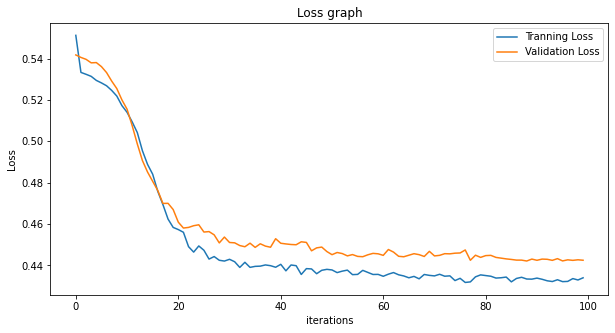

In [53]:
plt.figure(figsize=(10,5))
plt.title("Loss graph")
plt.plot(_tranning_loss,label="Tranning Loss")
plt.plot(_validation_loss,label="Validation Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

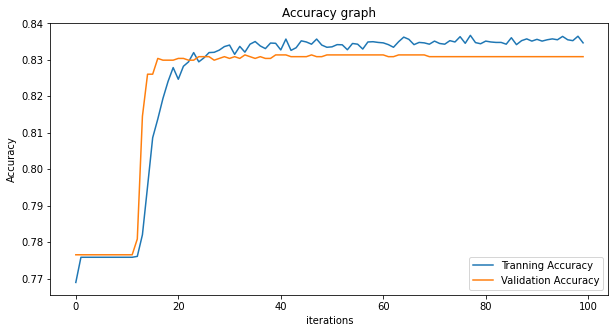

In [54]:
plt.figure(figsize=(10,5))
plt.title("Accuracy graph")
plt.plot(_tranning_acc,label="Tranning Accuracy")
plt.plot(_validation_acc,label="Validation Accuracy")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
model.eval()
with torch.no_grad():
      for batch in valid_iter:
          text, text_lengths = batch.text
          predictions = model(text).squeeze(1)

          rounded_preds = torch.round(torch.sigmoid(predictions))
          correct = (rounded_preds == batch.polarity).float() 

          # print(rounded_preds,batch.polarity)

          y_true_tensor = torch.cat((y_true_tensor,batch.polarity))
          y_pred_tensor = torch.cat((y_pred_tensor,rounded_preds))
          # acc = binary_accuracy(predictions, batch.polarity)
          # print(acc)

In [56]:
y_true = y_true_tensor.type(torch.LongTensor).tolist()
y_pred = y_pred_tensor.type(torch.LongTensor).tolist()

In [57]:
matrice = confusion_matrix(y_true,y_pred)
matrice

array([[1574,   24],
       [ 324,  137]])

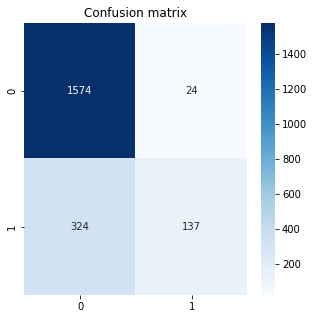

In [58]:
df_cm = pd.DataFrame(matrice,columns=[0,1],index=[0,1])
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.show()

In [59]:
classify_report = classification_report(y_true, y_pred, )
print(classify_report)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1598
           1       0.85      0.30      0.44       461

    accuracy                           0.83      2059
   macro avg       0.84      0.64      0.67      2059
weighted avg       0.83      0.83      0.80      2059

